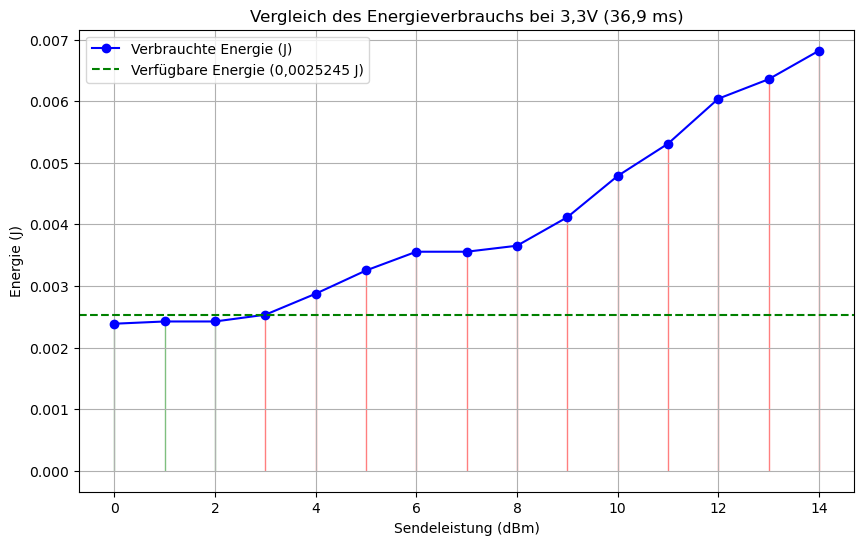

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Definieren der Daten
data = {
    'Sendeleistung (dBm)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Strom (mA)': [19.6, 19.9, 19.9, 20.8, 23.6, 26.7, 29.2, 29.2, 30, 33.8, 39.3, 43.6, 49.6, 52.2, 56],
}

# Zeit der Übertragung in Sekunden
t = 36.9 / 1000  # 36,9 ms

# Spannung
V = 3.3  # Volt

# Berechnung der verbrauchten Energie
data['Strom (A)'] = [i / 1000 for i in data['Strom (mA)']]
data['Energie (J)'] = [(V * i * t) for i in data['Strom (A)']]

# Verfügbare Energie (berechnete Differenz)
energie_verfuegbar = 0.0025245  # Joules

# Daten in einen DataFrame einfügen
df = pd.DataFrame(data)

# Erstellung des Diagramms
plt.figure(figsize=(10,6))
plt.plot(df['Sendeleistung (dBm)'], df['Energie (J)'], label='Verbrauchte Energie (J)', marker='o', color='blue')
plt.axhline(y=energie_verfuegbar, color='green', linestyle='--', label="Verfügbare Energie (0,0025245 J)")

# Grün und Rot füllen
for i in range(len(df)):
    if df['Energie (J)'][i] <= energie_verfuegbar:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (J)'][i]], color='green', alpha=0.5)
    else:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (J)'][i]], color='red', alpha=0.5)

plt.xlabel('Sendeleistung (dBm)')
plt.ylabel('Energie (J)')
plt.title('Vergleich des Energieverbrauchs bei 3,3V (36,9 ms)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

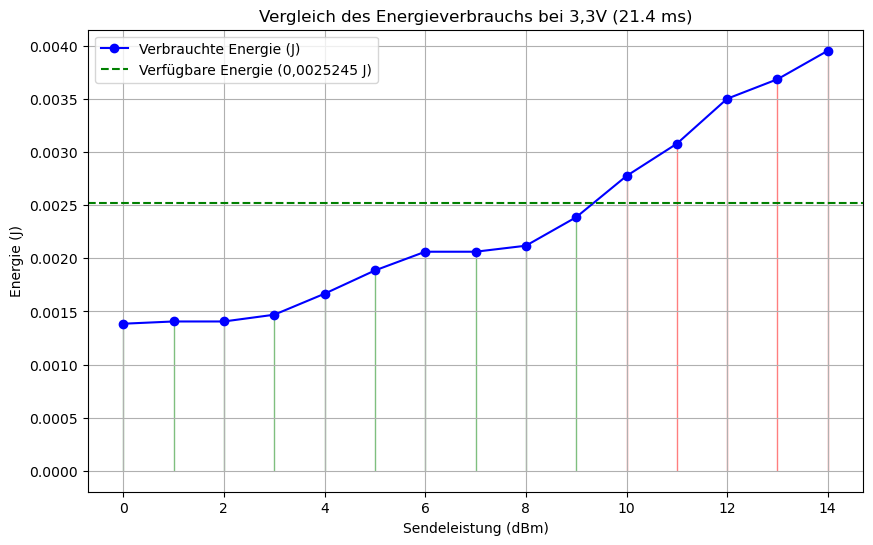

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Definieren der Daten
data = {
    'Sendeleistung (dBm)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Strom (mA)': [19.6, 19.9, 19.9, 20.8, 23.6, 26.7, 29.2, 29.2, 30, 33.8, 39.3, 43.6, 49.6, 52.2, 56],
}

# Zeit der Übertragung in Sekunden
t = 20/ 1000  # 20 ms

# Spannung
V = 3.3  # Volt

# Berechnung der verbrauchten Energie
data['Strom (A)'] = [i / 1000 for i in data['Strom (mA)']]
data['Energie (J)'] = [(V * i * t) for i in data['Strom (A)']]

# Verfügbare Energie (berechnete Differenz)
energie_verfuegbar = 0.0025245  # Joules

# Daten in einen DataFrame einfügen
df = pd.DataFrame(data)

# Erstellung des Diagramms
plt.figure(figsize=(10,6))
plt.plot(df['Sendeleistung (dBm)'], df['Energie (J)'], label='Verbrauchte Energie (J)', marker='o', color='blue')
plt.axhline(y=energie_verfuegbar, color='green', linestyle='--', label="Verfügbare Energie (0,0025245 J)")

# Grün und Rot füllen
for i in range(len(df)):
    if df['Energie (J)'][i] <= energie_verfuegbar:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (J)'][i]], color='green', alpha=0.5)
    else:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (J)'][i]], color='red', alpha=0.5)

plt.xlabel('Sendeleistung (dBm)')
plt.ylabel('Energie (J)')
plt.title('Vergleich des Energieverbrauchs bei 3,3V (20 ms)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

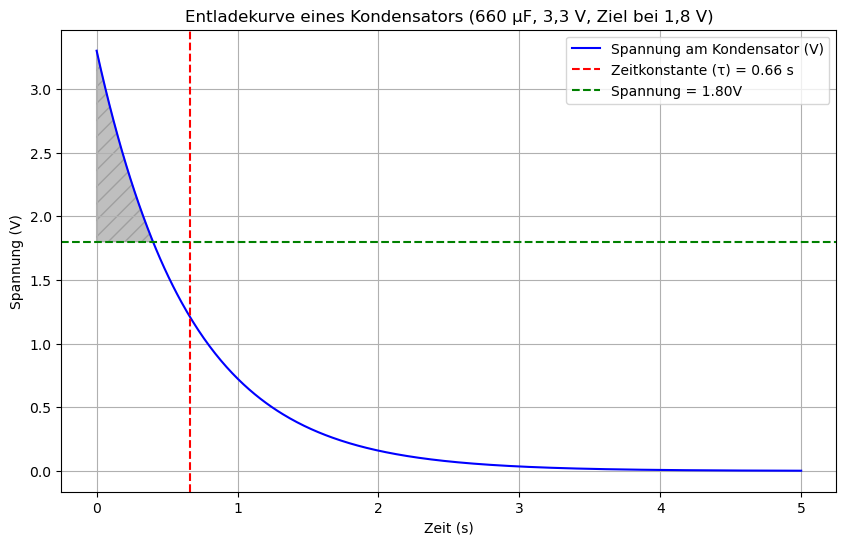

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Werte für die Decharge
V_initial = 3.3  # Anfangsspannung in Volt
C_total = 660e-6  # Gesamtkapazität in Farad (660 µF)

# Zeitkonstante basierend auf typischen Widerstandsanahmen (regulär definiert)
R_typical = 1000  # 1 kOhm für Annahme
tau_typical = R_typical * C_total

# Zeitbereich für die Simulation (0 bis 5 Sekunden)
t = np.linspace(0, 5, 500)
V_t_typical = V_initial * np.exp(-t / tau_typical)

# Zielspannung für die grüne Linie
V_target = 1.8  # 1,8 V

# Erstellen des Diagramms mit der Linie bei 1,8V
plt.figure(figsize=(10, 6))
plt.plot(t, V_t_typical, label='Spannung am Kondensator (V)', color='blue')
plt.axvline(x=tau_typical, color='red', linestyle='--', label=f'Zeitkonstante (τ) = {tau_typical:.2f} s')
plt.axhline(y=V_target, color='green', linestyle='--', label=f'Spannung = {V_target:.2f}V')

# Schraffieren des Bereichs vor Erreichen von 1,8V
plt.fill_between(t, V_t_typical, V_target, where=(V_t_typical >= V_target), color='gray', alpha=0.5, hatch='//')

plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (V)')
plt.title('Entladekurve eines Kondensators (660 µF, 3,3 V, Ziel bei 1,8 V)')
plt.grid(True)
plt.legend()

# Diagramm anzeigen
plt.show()
